In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom


In [2]:
def plot_graph(w, tit):
    axes = plt.gca()
    color = np.where(data["y"]==1, "red", "blue")
    plt.scatter(list(data['x1']), list(data['x2']), c=color)

    x_vals = np.array(axes.get_xlim())
    y_vals = []
    for i in x_vals:
        y = -w[0]/w[2] - (w[1]/w[2] * i)
        y_vals.append(y)
    plt.plot(x_vals, y_vals, '--')
    plt.title(tit)
    plt.show()

In [3]:
def check_missing_points(w):
    X = data[['x0', 'x1', 'x2']].values
    hypo_y = np.sign(np.dot(X, w))
    mismatched_indices = np.where(hypo_y != data["y"].values)[0]
    return mismatched_indices.tolist()

In [4]:
def plot_Ein(Ein):
    plt.xlabel("Iterations")
    plt.ylabel("Ein (In-Sample Error)")
    plt.title("Ein vs. Iterations for Pocket Algorithm")
    plt.plot(Ein)
    plt.show()

def pocket_algo(w):
    global max_itr
    w_best = tuple(w)
    miss_points = tuple(check_missing_points(w_best))
    w_best_points = len(miss_points)
    l_data = len(data)
    Ein = []
    n = max_itr # maxnumber of iterations
    out_itr = 0
    for i in range(n):
        j = miss_points[0]
        w[0] = w[0] + data["y"][j]*data["x0"][j]
        w[1] = w[1] + data["y"][j]*data["x1"][j]
        w[2] = w[2] + data["y"][j]*data["x2"][j]
        
        miss_points = tuple(check_missing_points(w))
        w_points = len(miss_points)
        Ein.append(w_best_points/l_data)
        
        if(w_points < w_best_points):
            w_best = tuple(w)
            w_best_points = w_points
            out_itr = i
        
        if(w_points == 0):
            w_best = tuple(w)
            w_best_points = w_points
            break

    plot_graph(w_best, "Pocket Algorithm")
    plot_Ein(Ein)
    print("Final Weights (Pocket):",w_best, "Number of Missclassified points:", w_best_points, ", Got Final Weights at iteration", out_itr)
    print("In sample Error:", w_best_points/len(data)*100,"%")

In [5]:
def check_miss_points(w):
    
    X = data[['x0', 'x1', 'x2']].values
    hypo_y = np.sign(np.dot(X, w))
    mismatched_indices = np.where(hypo_y != data["y"].values)[0]
    miss_list = mismatched_indices.tolist()
    len_miss_list = len(miss_list)
    if(len_miss_list>0):
        return True, miss_list[0]
    else:
        return False, -10

def perceptron_algo(w):
    flag, p_miss = check_miss_points(w)
    i = 0
    while flag:
        w[0] = w[0] + data["y"][p_miss]*data["x0"][p_miss]
        w[1] = w[1] + data["y"][p_miss]*data["x1"][p_miss]
        w[2] = w[2] + data["y"][p_miss]*data["x2"][p_miss]
        flag, p_miss = check_miss_points(w)
        i+=1
        if(i>1000):
            print("Perceptron Algorithm: The data is not linearly seperable or has some noisy data.")
            return None
    plot_graph(w, "Perceptron")
    miss_points = check_missing_points(w)
    print("Final Weights (Perceptron):", w, "Iterations:", i, ", Number of Missclassified Points:", len(miss_points))
    print("In sample Error:", len(miss_points)/len(data)*100,"%")

In [6]:
def linearRegression(X,Y):
    XT = np.transpose(X)
    XtX = np.matmul(XT,X)
    X_inv = np.linalg.inv(XtX)
    X_pi = np.matmul(X_inv,XT)
    W = np.matmul(X_pi,Y)
    
    miss_points = check_missing_points(W)
    
    plot_graph(W, "Linear Regression")
    print("Final Weights (Linear Regression):", W, "Number of Missclassified Points:", len(miss_points))
    print("In sample Error:", len(miss_points)/len(Y)*100,"%")
    return W

In [7]:
def plot10poly(w, tit, color='red'):
    color_1 = np.where(data_3d["y"]==1, "red", "blue")
    plt.scatter(list(data_3d[1]), list(data_3d[2]), c=color_1)
    axes = plt.gca()
    xlims = axes.get_xlim()
    ylims = axes.get_ylim()
    x1 = np.linspace(xlims[0], xlims[1], 1000)
    x2 = np.linspace(ylims[0], ylims[1], 1000)
    # meshgrid
    XM1, XM2 = np.meshgrid(x1, x2)

    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    w3 = w[3]
    w4 = w[4]
    w5 = w[5]
    w6 = w[6]
    w7 = w[7]
    w8 = w[8]
    w9 = w[9]
    
    z = w0 + w1*XM1 + w2*XM2 + w3*XM1**2 + w4*XM2**2 + w5*XM1*XM2 + w6*XM1**3 + w7*XM2**3 + w8*XM1**2*XM2 + w9*XM1*XM2**2
    # for i in range(data_3d.shape[1]-1):
    #     z = z + w[i]*data_3d[i]
    plt.contour(XM1, XM2, z, 1, colors = color)
    plt.title(tit)
    plt.show()


In [8]:
def check_missing_points_3d(w):
    X = data_3d.values
    hypo_y = np.sign(np.dot(X[:,:-1], w))
    mismatched_indices = np.where(hypo_y != data_3d["y"].values)[0]
    return mismatched_indices.tolist()

def pocket_algo_3d(w):
    global max_itr
    w_best = tuple(w)
    miss_points = tuple(check_missing_points_3d(w_best))
    w_best_points = len(miss_points)
    l_data = len(data_3d)
    Ein = []
    n = max_itr # maxnumber of iterations
    out_ite = n
    for i in range(n):
        j = miss_points[0]
        
        x = data_3d.iloc[j,:-1]
        y = data_3d.iloc[j,-1]
        w = w + x*y
        
        miss_points = tuple(check_missing_points_3d(w))
        w_points = len(miss_points)
        Ein.append(w_best_points/l_data)
        
        if(w_points < w_best_points):
            w_best = tuple(w)
            w_best_points = w_points
            out_itr = i
        
        if(w_points == 0):
            w_best = tuple(w)
            w_best_points = w_points
            break
    plot_Ein(Ein)
    plot10poly(w_best, "Pocket Algorithm 3d")
    print("Final Weights (Pocket):",w_best, "Number of Missclassified points:", w_best_points, ", Got Final Weights at iteration", out_itr)
    print("In sample Error:", w_best_points/len(data)*100,"%")
    return w_best

def linearRegression_3d(X_poly, Y):
    X_poly_t = np.transpose(X_poly)
    W = np.linalg.inv(X_poly_t.dot(X_poly)).dot(X_poly_t).dot(Y)
    # print("Coefficiets:", coefficients)
    miss_points = check_missing_points_3d(W)
    
    plot10poly(W, "Linear Regression 3d")
    print("Final Weights (Linear Regression 3d):", W, "Number of Missclassified Points:", len(miss_points))
    print("In sample Error:", len(miss_points)/len(Y)*100,"%")
    return W

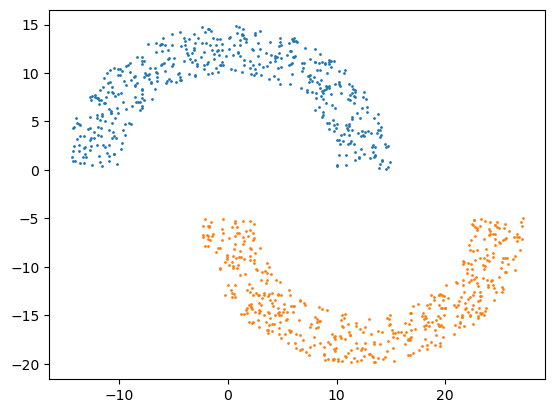

[[0.7481275358803376, 14.801126704339087], [4.550542576073642, 11.697073232789428], [11.030168697588973, 4.162462976776972], [-1.3540791595525068, 13.636178891113385], [10.966916896411956, 4.3122614404145025], [-5.438309078107238, 11.549774100405106], [2.7424407358464222, 13.055035529340781], [4.760985294625325, 13.614650276049549], [6.032200835514178, 11.701968029054942], [4.344441114107834, 11.267421444734474], [-10.78908446999374, 5.8656127467349], [0.4718513721827211, 11.825826833180024], [-2.4124090801696987, 13.086204723275774], [8.431380295788806, 11.975214999604276], [-7.368909666075993, 9.760319467141876], [-14.393260912505001, 1.3179367941502669], [-9.42945224165771, 6.316104337361708], [-12.317546483771249, 3.92402946785932], [14.495096358272004, 2.7272981442380235], [-6.608447097368735, 12.176465688652218], [9.251417663427496, 8.638846684653533], [11.670274494401564, 7.555071395036929], [2.524040663429048, 10.436738840862859], [13.05588281564987, 1.2208170175998774], [1.666

In [19]:
rad = 10
thk = 5
sep = 5

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x0 = [1]*(len(top)+len(bottom))
x1 = X1 + X2
x2 = Y1 + Y2
y = [1]*len(top) + [-1]*len(bottom)

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

data = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2, "y":y})

print(top+bottom)

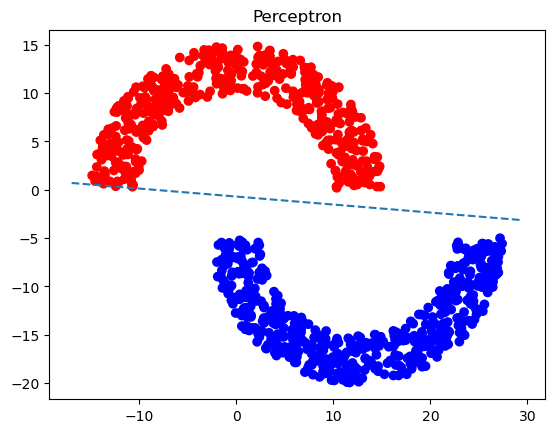

Final Weights (Perceptron): [26, 3.040138086846156, 36.70054956284913] Iterations: 26 , Number of Missclassified Points: 0
In sample Error: 0.0 %


In [10]:
w = [0,0,0]
perceptron_algo(w)

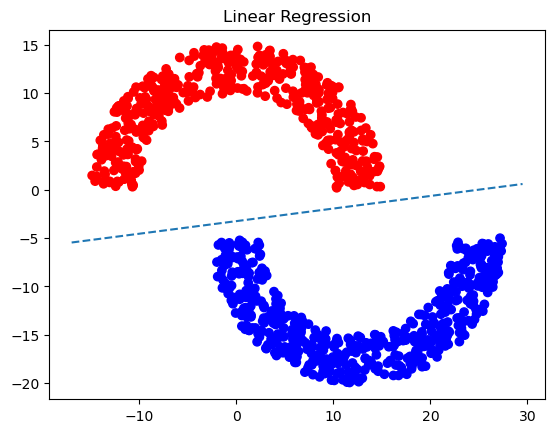

Final Weights (Linear Regression): [ 0.25225275 -0.01010263  0.07751972] Number of Missclassified Points: 0
In sample Error: 0.0 %


In [11]:
X = data.iloc[:, :3].values
Y = data.iloc[:, -1].values
W = linearRegression(X,Y)

Both algorithm classified the dataset properly with 0 in sample error.
PLA took around 10 iterations to classify the semicircles, which in turn means it consumed more computational power as compared to Linear Regression. 

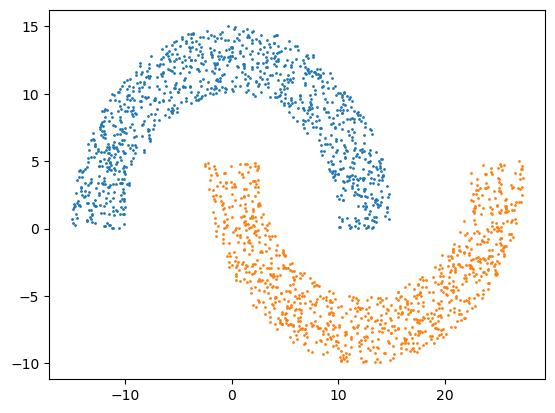

In [12]:
rad = 10
thk = 5
sep = -5

top,bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x0 = [1]*(len(top)+len(bottom))
x1 = X1 + X2
x2 = Y1 + Y2
y = [1]*len(top) + [-1]*len(bottom)

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

data = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2, "y":y}) 

In [13]:
w = [0,0,0]
perceptron_algo(w)

Perceptron Algorithm: The data is not linearly seperable or has some noisy data.


The data is not linearly seperable, therefore the perceptron will never end as there will be always a point which is missclassified.

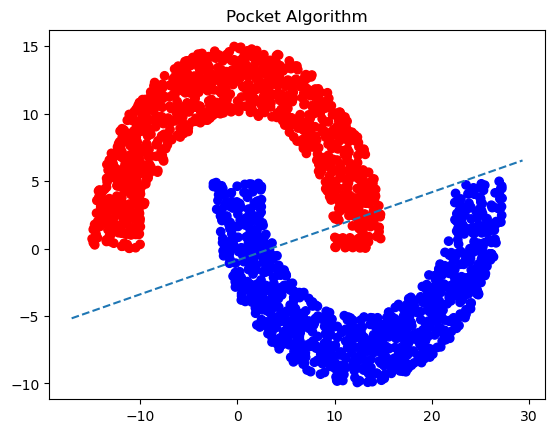

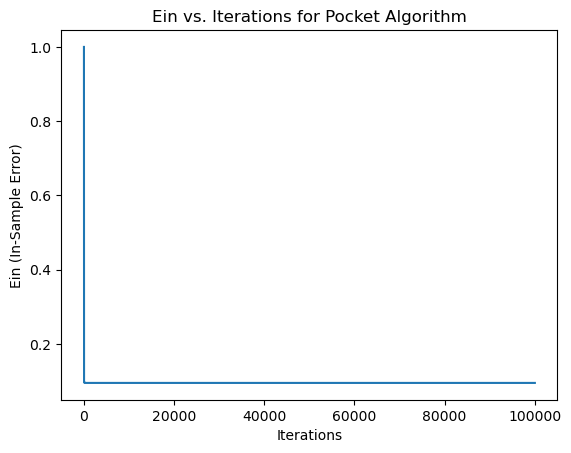

Final Weights (Pocket): (76, -22.23520207873406, 88.26809469491343) Number of Missclassified points: 190 , Got Final Weights at iteration 117
In sample Error: 9.5 %


In [14]:
max_itr = 100000
w = [0,0,0]
pocket_algo(w)

The lowest possible in sample error is mentioned above without any transformation using pocket algorithm.

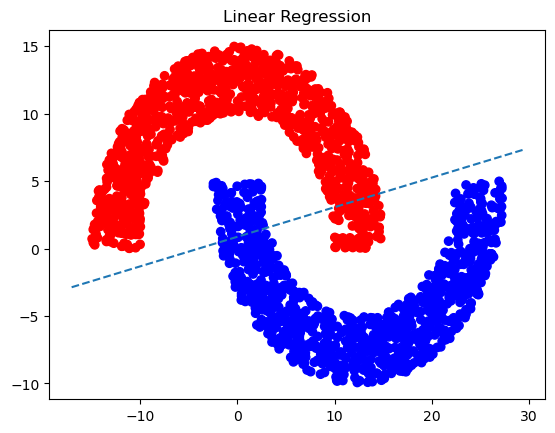

Final Weights (Linear Regression): [-0.08983202 -0.0223206   0.10190389] Number of Missclassified Points: 175
In sample Error: 8.75 %


In [15]:
X = data.iloc[:, :3].values
Y = data.iloc[:, -1].values
W = linearRegression(X,Y)

In [16]:
data_x = np.array(top + bottom)
data_poly = np.c_[[1]*len(data_x), data_x, data_x[:, 0]**2, data_x[:, 1]**2, data_x[:, 0] * data_x[:, 1], data_x[:, 0]**3, data_x[:, 1]**3, data_x[:, 0]**2*data_x[:, 1], data_x[:, 1]**2*data_x[:, 0]]
data_3d = pd.DataFrame(data_poly)
data_3d.insert(data_3d.shape[1],'y',y)

This is the 3rd order transformation of the data.

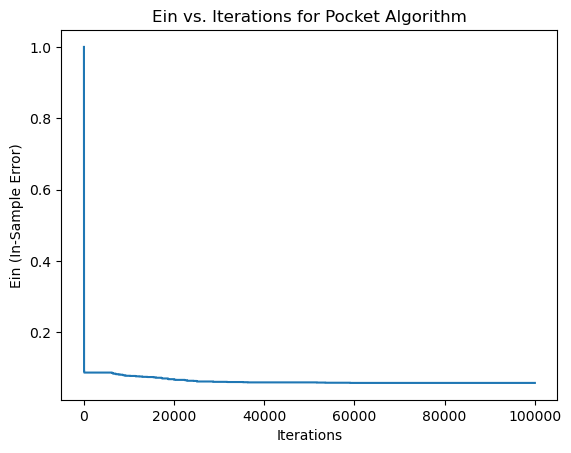

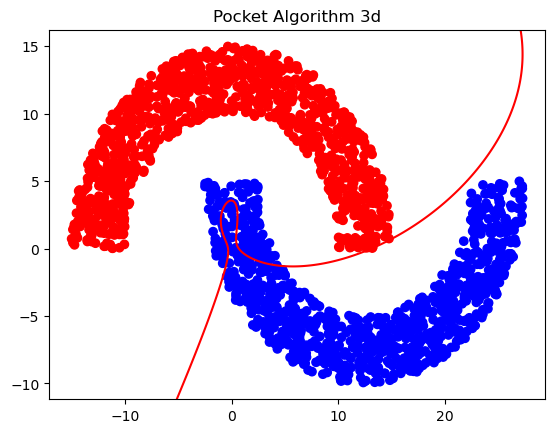

Final Weights (Pocket): (-43988.0, -65866.59815326339, 25166.31705221144, 201723.938600678, -81677.59896234897, 193292.80072008236, -15003.288099960826, 21892.600887289827, 28111.43563149695, -47689.88563761814) Number of Missclassified points: 117 , Got Final Weights at iteration 59057
In sample Error: 5.8500000000000005 %


In [17]:
max_itr = 100000
w = [0]*10
w_pocket_3d = pocket_algo_3d(w)

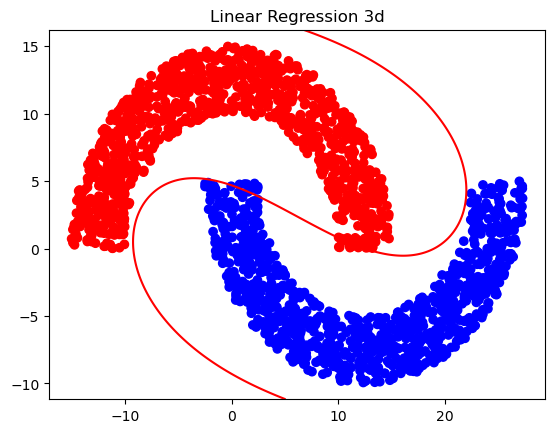

Final Weights (Linear Regression 3d): [-8.34919825e-01  2.00583035e-02  1.34306503e-01  8.51794272e-03
  1.42606282e-02  1.20955345e-02 -3.82496840e-04 -1.06469462e-03
 -5.41119298e-04 -1.05888307e-03] Number of Missclassified Points: 18
In sample Error: 0.8999999999999999 %


In [18]:
X = data_3d.iloc[:, :-1].values
Y = data_3d.iloc[:, -1].values
W = linearRegression_3d(X,Y)

The pocket algorithm consumes alot of computational power as compared to Linear Regression and still gives us bad result than the Linear Regression.